In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import load_data, stochastic_gradient_descent, compute_cost, target_prediction_plot
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [2]:
X_train, y_train = load_data()
X_features = ['Temperature', 'Humidity', 'Wind Speed']

m, n = X_train.shape

print(f'\nTraining Examples: {m}')
print(f'Features: {n}')


Training Examples: 96453
Features: 3


## Feature Scaling

In [3]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f'peak to peak X_train: {np.ptp(X_train, axis=0)}')
print(f'peak to peak X_norm: {np.ptp(X_norm, axis=0)}')

peak to peak X_train: [61.72777778  1.         63.8526    ]
peak to peak X_norm: [6.46262874 5.11582939 9.23588271]


## Relationship of Features with Apparent Temperature

Values of Apparent Temperature have a lot of variance w.r.t Humidity and Wind Speed. Which indicates these features do not have a large impact on the target values.

Temperature has a linear relation with Apparent Temperature thus linear regression is to be favored.

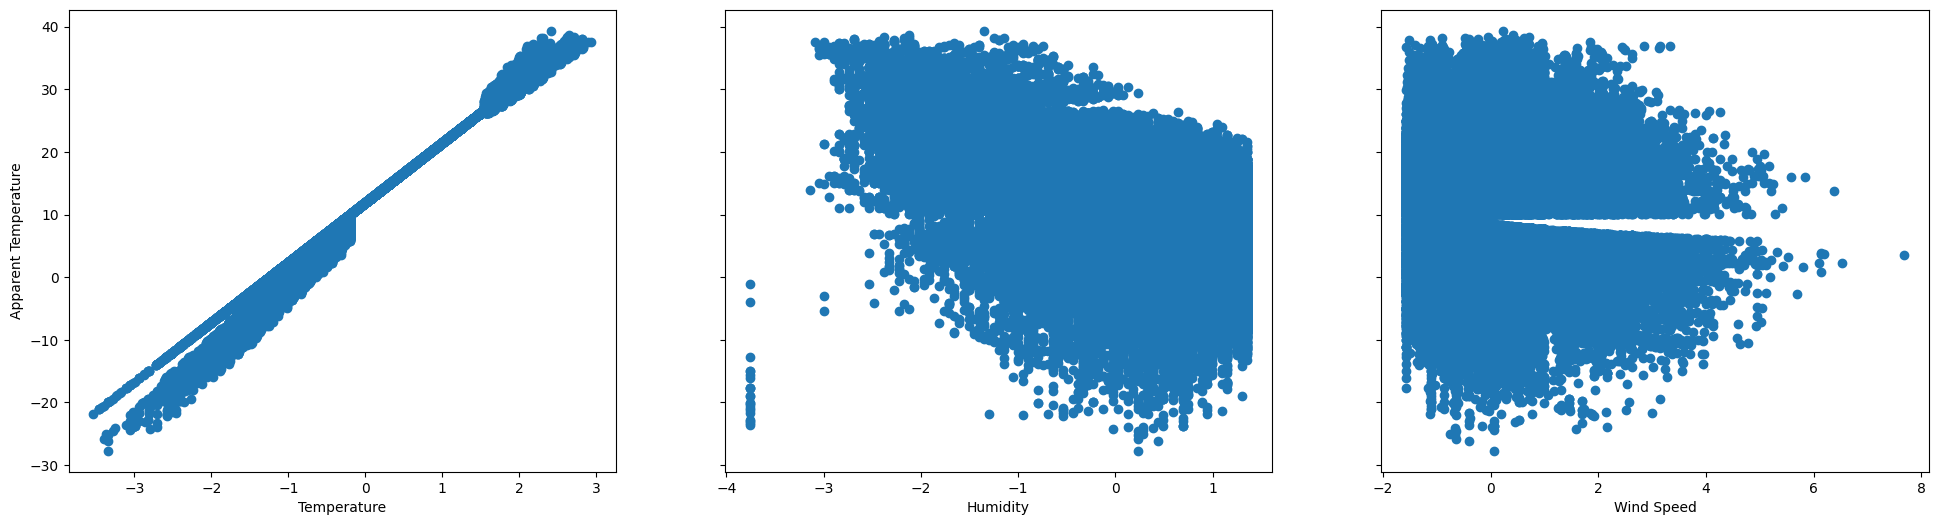

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Apparent Temperature')
plt.show()

In [5]:
w = np.zeros(n)
b = 0
learning_rate = 0.00018
iters = 100000

In [6]:
w, b = stochastic_gradient_descent(X_norm, y_train, w, b, learning_rate, iters)

print(f'\ncoefficients: {(w, b)}')
print(f'cost: {compute_cost(X_norm, y_train, w, b)}')

new
Iteration   0: Cost  116.12286638813097
Iteration   10000: Cost  5.032177912456688
Iteration   20000: Cost  1.4414125395640627
Iteration   30000: Cost  0.8292882941727425
Iteration   40000: Cost  0.6600168590547013
Iteration   50000: Cost  0.607461104203918
Iteration   60000: Cost  0.5905651937697932
Iteration   70000: Cost  0.5854586449049085
Iteration   80000: Cost  0.5835675376028965
Iteration   90000: Cost  0.5834105430024059

coefficients: (array([10.76563513,  0.18384574, -0.67698811]), 10.856706366402998)
cost: 0.5834113527923201


## Plotting Target and Prediction
First 100 entries of the dataset are chosen, their target value and prediction is plotted below.

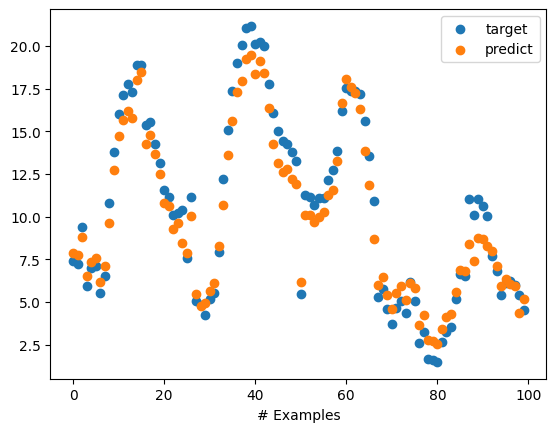

In [7]:
target_prediction_plot(X_norm, y_train, w, b, 100)

## Discarding Humidity and Wind Speed
The coefficient values suggest lesser impact of Humidity and Wind Speed.
The Temperature coefficient is much larger than the other two feature coefficient.

In [8]:
w_t = np.zeros(n)
b_t = 0
learning_rate_t = 0.00018
iters_t = 100000

However with only Temperature our cost is worse than before.

In [12]:
w_t, b_t = stochastic_gradient_descent(X_train[:,0:1], y_train, w[0], b, learning_rate, iters)

print(f'coefficients: {(w_t, b)}')
print(f'cost: {compute_cost(X_train[:,0:1], y_train, w_t, b_t)}')

new
Iteration   0: Cost  [12502.17778263]
Iteration   10000: Cost  [8.69842595]
Iteration   20000: Cost  [2.69422763]
Iteration   30000: Cost  [1.33631271]
Iteration   40000: Cost  [0.95755654]
Iteration   50000: Cost  [0.87790611]
Iteration   60000: Cost  [0.84706257]
Iteration   70000: Cost  [0.85640463]
Iteration   80000: Cost  [0.84153363]
Iteration   90000: Cost  [0.842245]
coefficients: (array([1.12320155]), 10.856706366402998)
cost: [0.8621794]


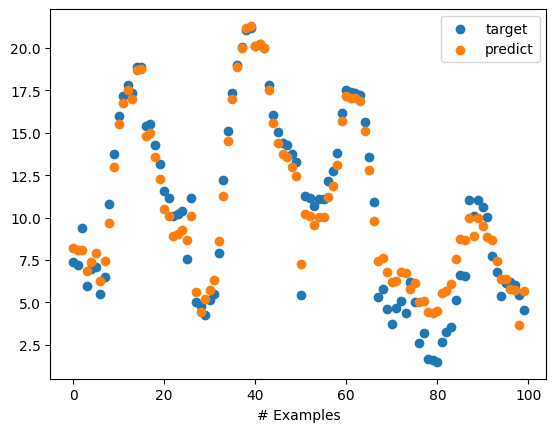

In [11]:
target_prediction_plot(X_train[:,0:1], y_train, w_t, b_t, 100)